# Домашнее задание №4

# Задание №1
1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. 
3. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.
4. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [4]:
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from string import punctuation as punct

wnl = WordNetLemmatizer()

In [5]:
# 2
with open('Harry_Potter_and_the_Sorcerers_Stone.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
# очищение от пунктуации и приведение к нижнему регистру
words = [word.lower().strip(punct + "«»—") for word in word_tokenize(text)]
# удаление пустоты
words = list(filter(None, words))

lemmas = [wnl.lemmatize(w) for w in words]

with open('Harry_Potter_and_the_Sorcerers_Stone_lemmatized.txt', 'w+', encoding='utf-8') as g:
    g.write(' '.join(lemmas))

In [6]:
# 3
from collections import Counter

def get_relative_frequency(words):
    # абсолютная частота list(tuple(word, occurences))
    absolute_frequency = list(Counter(words).items())
    # отсортированный по убыванию частотный словарь
    absolute_frequency.sort(reverse=True, key=lambda x: x[1])
    # количество слов
    count = len(words)
    # относительная частота list(tuple(word, occurences / total number of words))
    return [(w, c / count) for w, c in absolute_frequency]

In [7]:
import matplotlib.pyplot as plt

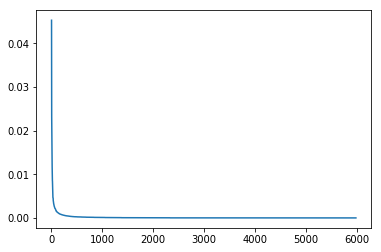

In [8]:
relative_frequency = get_relative_frequency(lemmas)
plt.plot(range(1, len(relative_frequency) + 1), 
         [f for w, f in relative_frequency]) 
plt.show()

# закон Ципфа выполняется

In [9]:
# 4
from nltk.corpus import stopwords

In [10]:
sw = stopwords.words('english')
filtered = [(w, f) for w, f in relative_frequency if w not in sw]

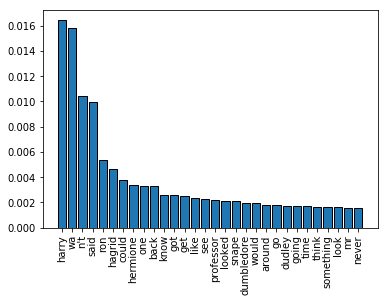

In [11]:
most_frequent = filtered[:30]
plt.bar(range(30), [f for w, f in most_frequent], edgecolor='black')
plt.xticks(range(30), [w for w, f in most_frequent], rotation=90)
plt.show()